In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

%matplotlib inline

In [2]:
credit_data = pd.read_csv("../data/Simulated_Data_Train.csv")
credit_data.columns

Index(['tot_credit_debt', 'avg_card_debt', 'credit_age', 'credit_good_age',
       'card_age', 'non_mtg_acc_past_due_12_months_num',
       'non_mtg_acc_past_due_6_months_num', 'mortgages_past_due_6_months_num',
       'credit_past_due_amount', 'inq_12_month_num', 'card_inq_24_month_num',
       'card_open_36_month_num', 'auto_open_ 36_month_num', 'uti_card',
       'uti_50plus_pct', 'uti_max_credit_line', 'uti_card_50plus_pct',
       'ind_acc_XYZ', 'rep_income', 'States', 'Default_ind'],
      dtype='object')

In [5]:
state_analysis_cols = ['tot_credit_debt', 'credit_good_age', 'non_mtg_acc_past_due_6_months_num',
                       'inq_12_month_num', 'uti_max_credit_line', 'rep_income', 'Default_ind', 'States']
state_data = credit_data[state_analysis_cols].sample(1000)
state_data.fillna(state_data.mean())
state_data["state_code"] = state_data.States.map({"AL": 0, "LA": 0, "SC": 1, "FL": 2, "SC": 3, "GA": 4, "MS": 5, "NC": 6})
states = ["AL", "SC", "FL", "SC", "GA", "MS", "NC"]

pairs = [(i, j) for i in range(len(state_analysis_cols) - 1) 
                for j in range(len(state_analysis_cols) - 1)
                if i < j]
plt.rcParams["figure.figsize"] = [50, 40]
plt.rcParams["figure.dpi"] = 300
fig, ax = plt.subplots(5, 4)

for row in range(5): 
    for col in range(4): 
        if (5*row + col) < 20 : 
            feature1, feature2 = pairs[5 * row + col]
            ax[row][col].set_title(f"{state_analysis_cols[feature1]} vs. {state_analysis_cols[feature2]}")

            for i in range(7): 
                xs = state_data[state_data["state_code"] == i][state_analysis_cols[feature1]]
                ys = state_data[state_data["state_code"] == i][state_analysis_cols[feature2]]
                ax[row][col].scatter(xs, ys, marker = "x", label = states[i])

ax[0][0].legend()   
plt.savefig("States.svg",format = "svg",  dpi = 300)

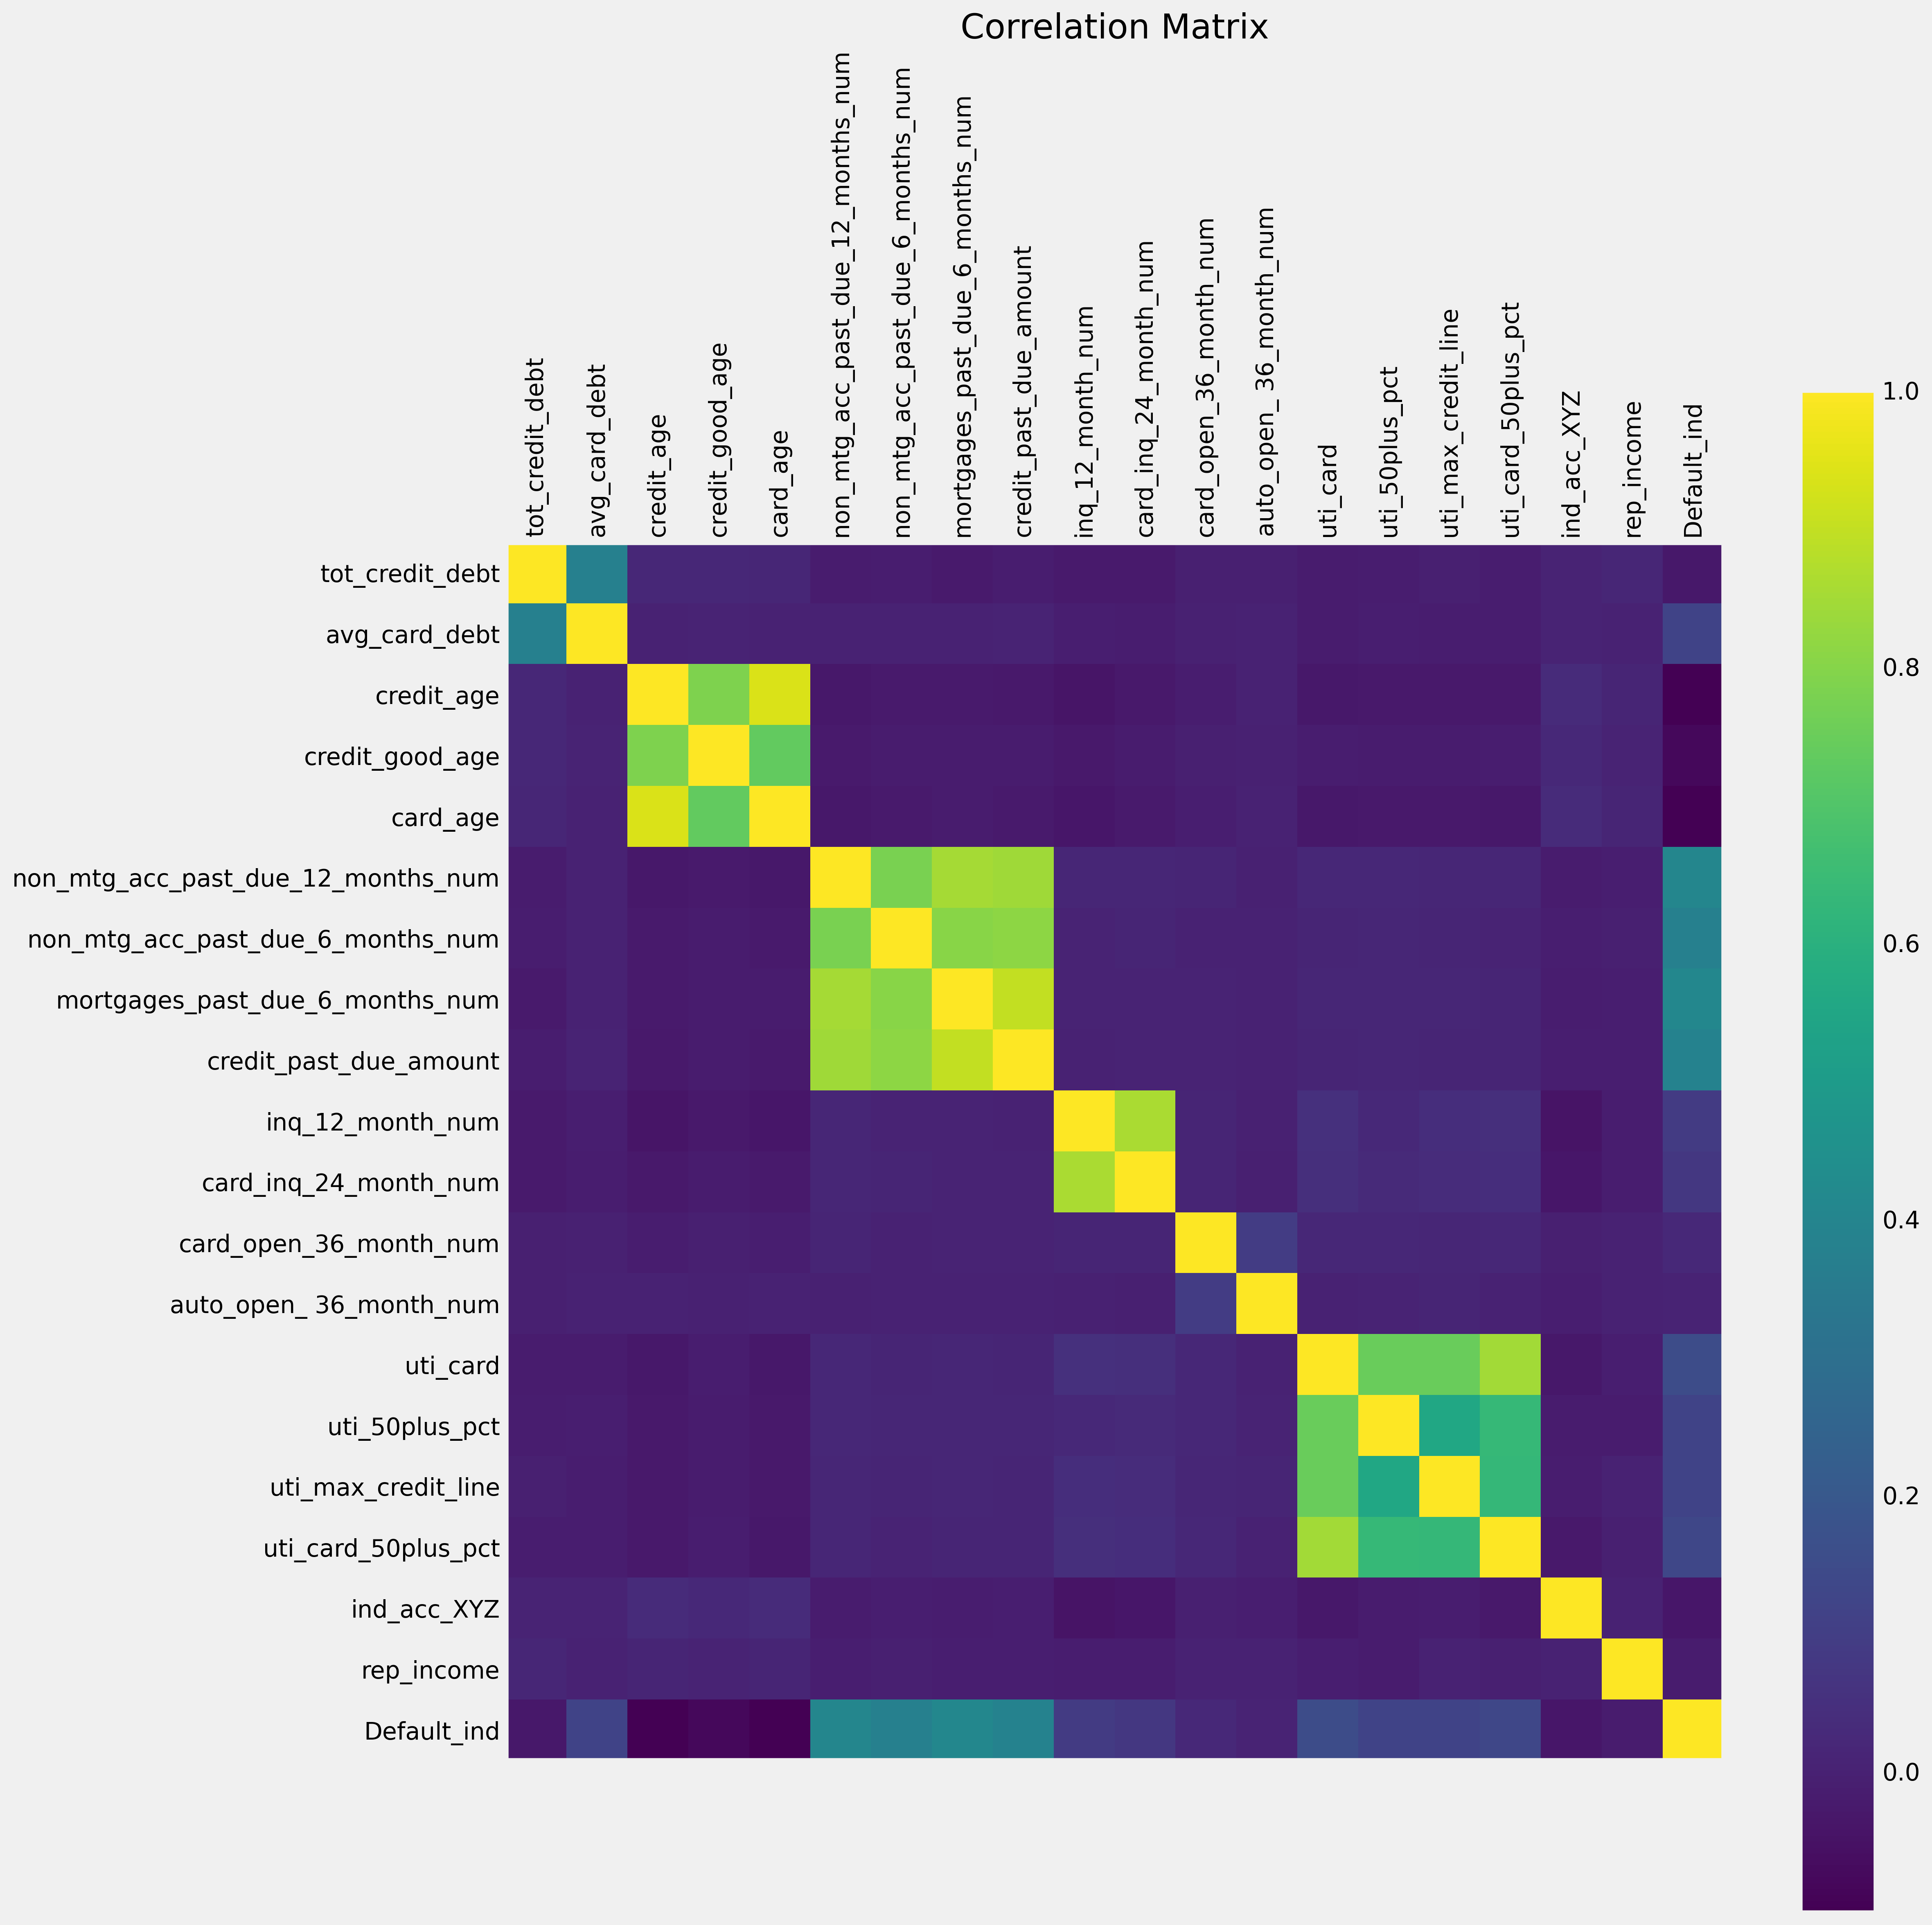

In [25]:
col_names = list(credit_data.select_dtypes("number").columns)

plt.rcParams["figure.figsize"] = [20, 20]
plt.rcParams["figure.dpi"] = 300

plt.style.use("fivethirtyeight")
plt.matshow(credit_data.corr())
plt.xticks(np.arange(len(col_names)), labels = col_names, rotation = 90)
plt.yticks(range(len(col_names)), labels = col_names)
plt.grid(b = None)
plt.title("Correlation Matrix")
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show()